# Render the Vega Charts as PNGs

The vega charts are required as thumbnail PNGs for the simulation landing page. Currently there doesn't seem to be a way to do this without some manual input in Python. 

In [33]:
import glob
from toolz.curried import pipe, map, do
import vega
import simulations
import json

In [34]:
def read_json(filepath):
    with open(filepath, 'r') as stream:
        data = json.load(stream)
    return data

In [37]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

!rm -rf ~/Downloads/vega*.png

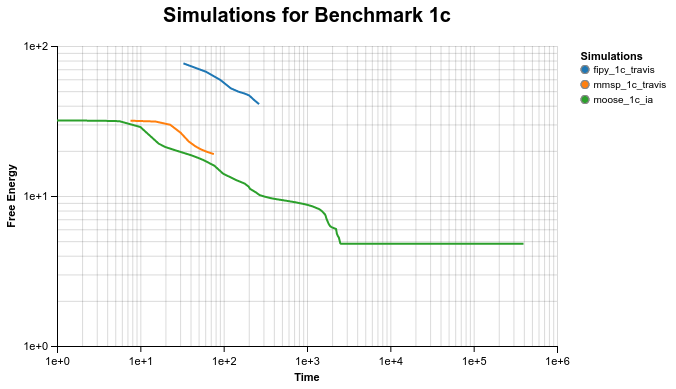

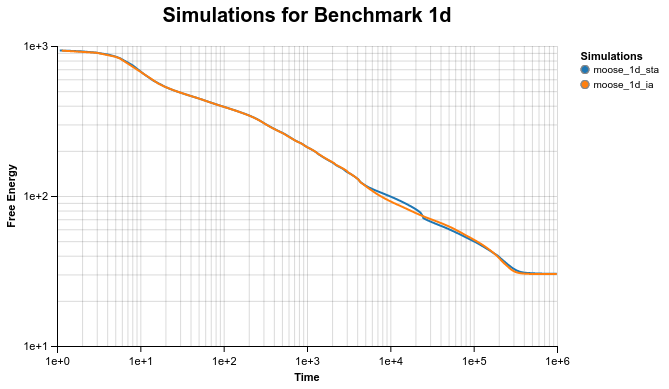

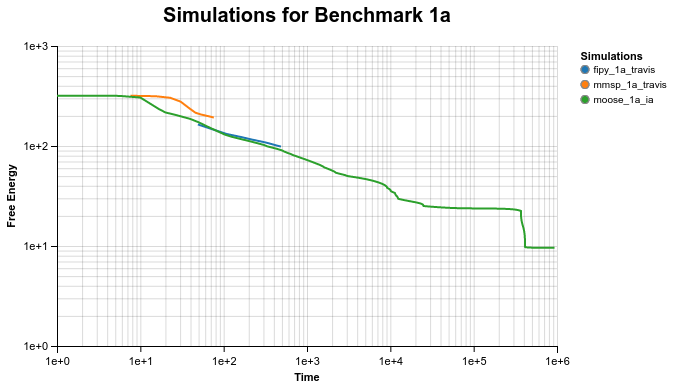

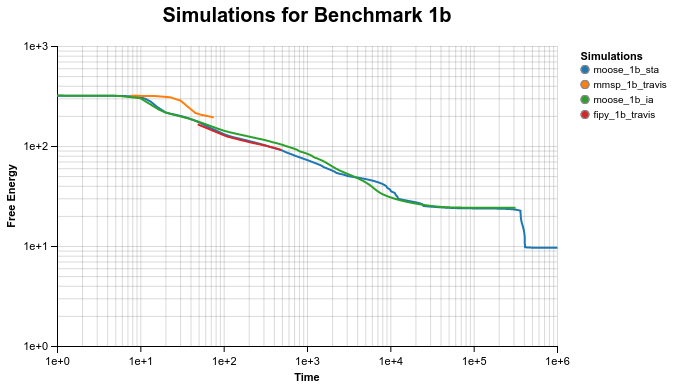

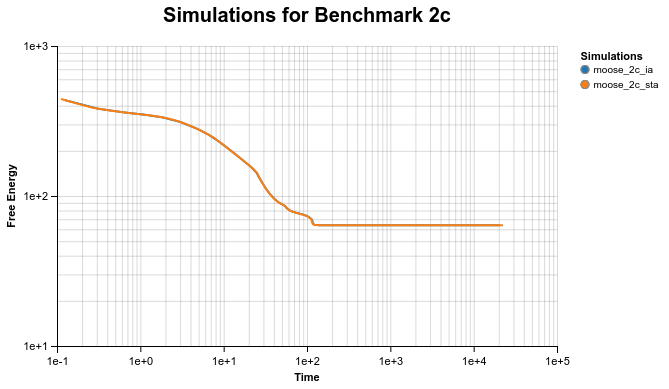

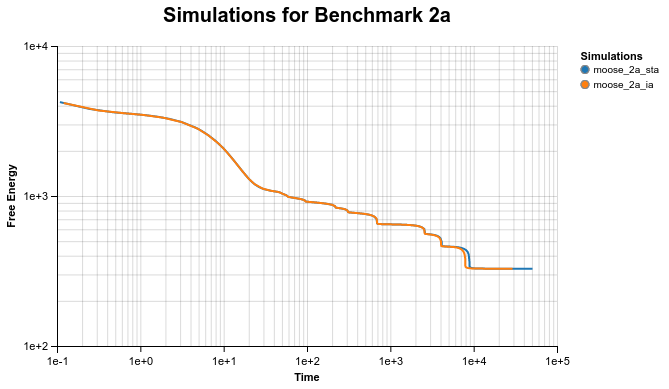

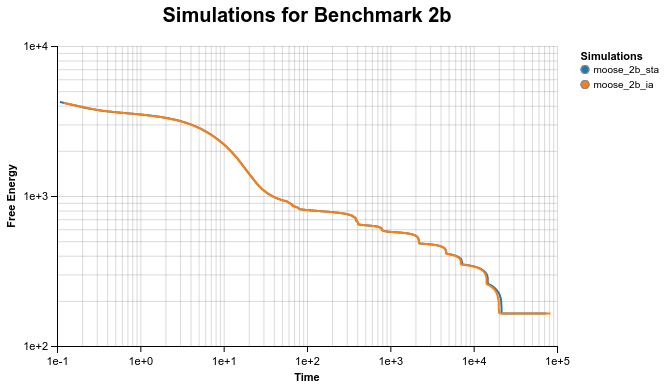

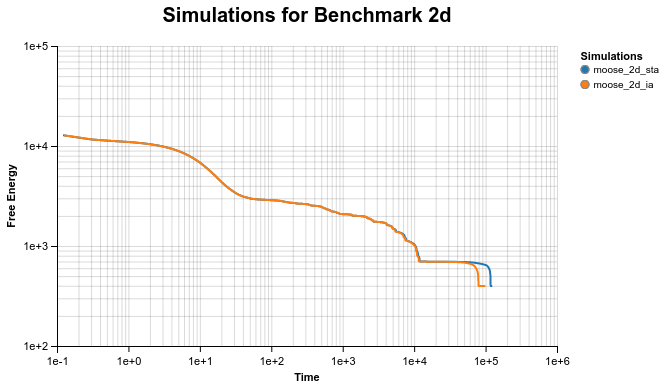

In [38]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

_ = pipe(
    "../data/charts/*_free_energy.json",
    glob.glob,
    sorted,
    map(read_json),
    map(vega.vega.Vega),
    map(do(lambda obj: obj.display())),
    list
)

In [40]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

!ls ~/Downloads/vega*.png

/home/wd15/Downloads/vega (1).png  /home/wd15/Downloads/vega (5).png
/home/wd15/Downloads/vega (2).png  /home/wd15/Downloads/vega (6).png
/home/wd15/Downloads/vega (3).png  /home/wd15/Downloads/vega (7).png
/home/wd15/Downloads/vega (4).png  /home/wd15/Downloads/vega.png


In [56]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

from toolz.curried import itemmap
import shutil

mapping = {
    '1a' : '',
    '1b' : ' (1)',
    '1c' : ' (2)',
    '1d' : ' (3)',
    '2a' : ' (4)',
    '2b' : ' (5)',
    '2c' : ' (6)',
    '2d' : ' (7)',
}

pipe(
    mapping,
    itemmap(lambda kv: ('../images/' + kv[0] + '_free_energy.png',
                        '/home/wd15/Downloads/vega' + kv[1] + '.png')),
    do(itemmap(lambda kv: (shutil.copy(kv[1], kv[0]), None)))
)

{'../images/1a_free_energy.png': '/home/wd15/Downloads/vega.png',
 '../images/1b_free_energy.png': '/home/wd15/Downloads/vega (1).png',
 '../images/1c_free_energy.png': '/home/wd15/Downloads/vega (2).png',
 '../images/1d_free_energy.png': '/home/wd15/Downloads/vega (3).png',
 '../images/2a_free_energy.png': '/home/wd15/Downloads/vega (4).png',
 '../images/2b_free_energy.png': '/home/wd15/Downloads/vega (5).png',
 '../images/2c_free_energy.png': '/home/wd15/Downloads/vega (6).png',
 '../images/2d_free_energy.png': '/home/wd15/Downloads/vega (7).png'}

In [57]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

!ls ../images/*.png

../images/1a_free_energy.png  ../images/2c_free_energy.png
../images/1b_free_energy.png  ../images/2d_free_energy.png
../images/1c_free_energy.png  ../images/CHiMaD_NewsThumbnail.png
../images/1d_free_energy.png  ../images/chimad.png
../images/2a_free_energy.png  ../images/OH_logo-24x24.png
../images/2b_free_energy.png
